In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_bw = pd.read_csv("ev2_bikewale.csv")
data_model = pd.read_csv("ev_model_spec.csv")
data = data_bw.merge(data_model, how = 'left', on = 'Model Name')

In [3]:
data

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms,2,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3.0,Gemopai Ryder,70821,90,25,80,4,250
840,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms,5,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN,Gemopai Ryder,70821,90,25,80,4,250
841,"Up to 2 years the condition was good,\nAfter 2...",Daily Commute,> 1 yr,5000-10000 kms,2,2.0,2.0,4.0,2.0,3.0,NaN,1.0,NaN,Gemopai Ryder,70821,90,25,80,4,250
842,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms,5,4.0,4.0,NaN,NaN,NaN,4.0,NaN,5.0,Gemopai Ryder,70821,90,25,80,4,250


In [4]:
((data.isnull().sum() * 100/data.shape[0])).sort_values(ascending = False)

Maintenance cost               78.672986
Extra Features                 78.080569
Performance                    59.123223
Value for Money                53.791469
Comfort                        37.203791
Ridden for                     20.853081
Service Experience             16.706161
Reliability                    15.165877
Visual Appeal                  12.440758
review                          5.568720
Used it for                     0.000000
rating                          0.000000
Owned for                       0.000000
Model Name                      0.000000
Price                           0.000000
Riding Range (km)               0.000000
Top Speed (kmph)                0.000000
Weight (kg)                     0.000000
Battery Charging Time (hrs)     0.000000
Rated Power (W)                 0.000000
dtype: float64

In [5]:
data.isnull().sum()

review                          47
Used it for                      0
Owned for                        0
Ridden for                     176
rating                           0
Visual Appeal                  105
Reliability                    128
Performance                    499
Service Experience             141
Extra Features                 659
Comfort                        314
Maintenance cost               664
Value for Money                454
Model Name                       0
Price                            0
Riding Range (km)                0
Top Speed (kmph)                 0
Weight (kg)                      0
Battery Charging Time (hrs)      0
Rated Power (W)                  0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review                       797 non-null    object 
 1   Used it for                  844 non-null    object 
 2   Owned for                    844 non-null    object 
 3   Ridden for                   668 non-null    object 
 4   rating                       844 non-null    int64  
 5   Visual Appeal                739 non-null    float64
 6   Reliability                  716 non-null    float64
 7   Performance                  345 non-null    float64
 8   Service Experience           703 non-null    float64
 9   Extra Features               185 non-null    float64
 10  Comfort                      530 non-null    float64
 11  Maintenance cost             180 non-null    float64
 12  Value for Money              390 non-null    float64
 13  Model Name          

In [7]:
data_segment = pd.DataFrame(data)
print(data_segment)

                                                review    Used it for  \
0    We all checked the bike's capacity to be 150 k...  Daily Commute   
1    Performance is very poor on this bike. The cha...     Everything   
2    I purchased this in April 2022 and the sales s...  Daily Commute   
3    If any issues come in scooty parts not availab...  Daily Commute   
4    Don't buy this vehicle unless you have a near ...  Daily Commute   
..                                                 ...            ...   
839  Scooty is ok but 250 motor power is less. So t...  Daily Commute   
840  Superb scooty. good look, Many color options ....     Everything   
841  Up to 2 years the condition was good,\nAfter 2...  Daily Commute   
842  Compare to other scooters it is a best bike, c...  Daily Commute   
843  This bike is good as this segment. can use the...  Daily Commute   

         Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0      Never owned             NaN       1       

# Segmentation on 'Used it for'

In [8]:
usage_segmentation = data_segment.groupby('Used it for').agg({
    'rating': 'mean',
    'Visual Appeal': 'mean',
    'Reliability': 'mean',
    'Performance': 'mean',
    'Service Experience': 'mean',
    'Extra Features': 'mean',
    'Comfort': 'mean',
    'Maintenance cost': 'mean',
    'Value for Money': 'mean'
}).reset_index()


usage_segmentation.columns = ['Usage Purpose', 'Avg Rating', 'Avg Visual Appeal', 'Avg Reliability', 
                              'Avg Performance', 'Avg Service Experience', 'Avg Extra Features', 
                              'Avg Comfort', 'Avg Maintenance Cost', 'Avg Value for Money']


print("\nSegmentation based on 'Used it for':\n")
print(usage_segmentation)


Segmentation based on 'Used it for':

        Usage Purpose  Avg Rating  Avg Visual Appeal  Avg Reliability  \
0       Daily Commute    3.228333           3.708015         3.187377   
1          Everything    3.937500           4.112676         3.857143   
2       Leisure Rides    3.750000           3.750000         3.937500   
3  Occasional Commute    3.017857           3.615385         2.916667   
4               Tours    3.500000           3.600000         2.800000   

   Avg Performance  Avg Service Experience  Avg Extra Features  Avg Comfort  \
0         3.448133                3.014000            2.907143     3.516393   
1         3.820513                3.750000            3.057143     4.307692   
2         3.750000                3.466667            3.333333     3.500000   
3         3.117647                2.659574            2.333333     3.454545   
4         5.000000                3.400000            5.000000     3.250000   

   Avg Maintenance Cost  Avg Value for Money  


# Segmentation on 'Owned for'

In [9]:
ownership_segmentation = data_segment.groupby('Owned for').agg({
    'rating': 'mean',
    'Maintenance cost': 'mean',
    'Value for Money': 'mean'
}).reset_index()


ownership_segmentation.columns = ['Ownership Duration', 'Avg Rating', 'Avg Maintenance Cost', 'Avg Value for Money']


print("\nSegmentation based on 'Owned for':\n")
print(ownership_segmentation)


Segmentation based on 'Owned for':

   Ownership Duration  Avg Rating  Avg Maintenance Cost  Avg Value for Money
0          3-6 months    3.333333              3.772727             3.517857
1       6 months-1 yr    3.186567              3.230769             3.246575
2          < 3 months    3.481818              3.827586             3.684211
3              > 1 yr    2.625616              2.620000             2.756757
4         Never owned    4.222857              3.791667             4.163636
5  Occasional Commute    4.000000                   NaN                  NaN


# Segmentation on 'Price'

In [11]:
data_segment['Price Segment'] = pd.qcut(data_segment['Price'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

print(data_segment[['Price', 'Price Segment']])


      Price Price Segment
0    137890          High
1    137890          High
2    137890          High
3    137890          High
4    137890          High
..      ...           ...
839   70821           Low
840   70821           Low
841   70821           Low
842   70821           Low
843   70821           Low

[844 rows x 2 columns]


# Segmenation on 'Battery charging time'

In [14]:
data_segment['Charging Time Segment'] = pd.qcut(data_segment['Battery Charging Time (hrs)'], q=4, labels=['Very Fast', 'Fast', 'Slow', 'Very Slow'])

print(data_segment[['Battery Charging Time (hrs)', 'Charging Time Segment']])


     Battery Charging Time (hrs) Charging Time Segment
0                              5                  Fast
1                              5                  Fast
2                              5                  Fast
3                              5                  Fast
4                              5                  Fast
..                           ...                   ...
839                            4             Very Fast
840                            4             Very Fast
841                            4             Very Fast
842                            4             Very Fast
843                            4             Very Fast

[844 rows x 2 columns]


# Charging time mean rating

In [13]:
charging_time_analysis = data_segment.groupby('Charging Time Segment')['rating'].mean()

print(charging_time_analysis)

Charging Time Segment
Very Fast    2.959276
Fast         3.509852
Slow         3.120000
Very Slow    3.552083
Name: rating, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_7104\1033826163.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charging_time_analysis = data_segment.groupby('Charging Time Segment')['rating'].mean()


# Correlation Matrix


Correlation Matrix:

                               rating  Visual Appeal  Reliability  \
rating                       1.000000       0.766609     0.892309   
Visual Appeal                0.766609       1.000000     0.776160   
Reliability                  0.892309       0.776160     1.000000   
Performance                  0.873053       0.781042     0.855463   
Service Experience           0.874777       0.738868     0.861297   
Extra Features               0.877789       0.747919     0.823643   
Comfort                      0.830538       0.785004     0.810912   
Maintenance cost             0.690527       0.618095     0.711529   
Value for Money              0.868278       0.739205     0.824377   
Price                        0.087845       0.118774     0.080600   
Riding Range (km)            0.121943       0.124082     0.083186   
Top Speed (kmph)             0.018036       0.079829     0.018587   
Weight (kg)                 -0.050531       0.052593    -0.028448   
Battery Char

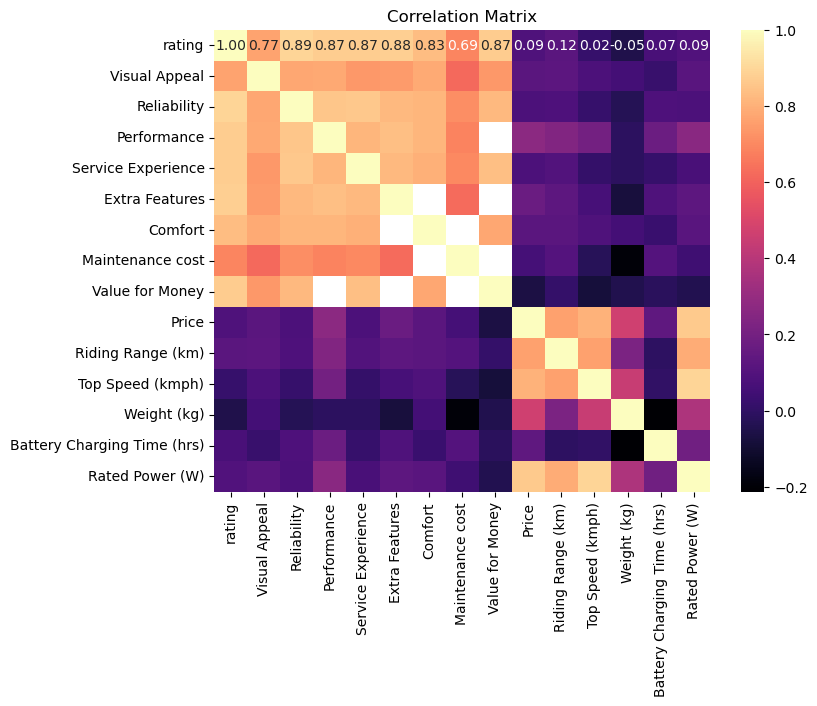


Key Drivers for 'rating':

rating                         1.000000
Reliability                    0.892309
Extra Features                 0.877789
Service Experience             0.874777
Performance                    0.873053
Value for Money                0.868278
Comfort                        0.830538
Visual Appeal                  0.766609
Maintenance cost               0.690527
Riding Range (km)              0.121943
Rated Power (W)                0.090790
Price                          0.087845
Battery Charging Time (hrs)    0.067937
Weight (kg)                    0.050531
Top Speed (kmph)               0.018036
Name: rating, dtype: float64


In [15]:
numeric_data = data_segment.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

print("\nCorrelation Matrix:\n")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

if 'rating' in correlation_matrix.columns:
    key_drivers = correlation_matrix['rating'].abs().sort_values(ascending=False)
    print("\nKey Drivers for 'rating':\n")
    print(key_drivers)
else:
    print("The 'rating' column is not present in the numeric data.")

# Principle Component Analysis

In [27]:
print(data_segment.columns)

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)',
       'Price Segment', 'Charging Time Segment'],
      dtype='object')


In [36]:
data_segment = data.iloc[:, 5:13].copy()

In [37]:
data_segment = data_segment.fillna(0.)

In [38]:
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 52.9 KB


In [39]:
data_segment.isnull().sum()

Visual Appeal         0
Reliability           0
Performance           0
Service Experience    0
Extra Features        0
Comfort               0
Maintenance cost      0
Value for Money       0
dtype: int64

In [40]:
data_segment.mean()

Visual Appeal         3.309242
Reliability           2.811611
Performance           1.441943
Service Experience    2.619668
Extra Features        0.643365
Comfort               2.300948
Maintenance cost      0.723934
Value for Money       1.562796
dtype: float64

In [41]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segment)

In [42]:
pca = PCA(random_state = 42)
pca.fit(data_scaled)

PCA(random_state=42)

In [43]:
data_pca = pca.transform(data_scaled)
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x +1}' for x in range(len(data_segment.columns))])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.291227,-1.038055,0.354864,-0.623469,-1.102720,-0.169287,-0.438012,0.957827
1,0.710801,-1.394405,-0.360466,-0.621671,0.320899,-0.086053,-0.426279,-0.149917
2,-0.849149,-1.189765,0.167683,-0.410898,-0.409054,-0.191904,-0.329993,0.830738
3,1.967022,-0.878935,-0.100197,0.330003,-0.075822,0.069599,0.013068,0.011328
4,0.078940,-1.017161,-0.079210,-0.324132,-0.961554,0.005517,-0.107260,0.427972


In [45]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.845017,0.425007,0.425007
PC2,1.736646,0.376546,0.801553
PC3,0.903486,0.101915,0.903468
PC4,0.517750,0.033468,0.936936
PC5,0.405239,0.020503,0.957439
PC6,0.379558,0.017987,0.975426
PC7,0.337883,0.014254,0.989680
PC8,0.287510,0.010320,1.000000


In [47]:
factor_loadings = pd.DataFrame(pca.components_, columns = data_segment.columns, index = df_pca.columns).T
factor_loadings.style.background_gradient(cmap = 'Purples')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,-0.480170,0.117814,0.063320,-0.730598,0.247014,0.105903,0.375474,0.067539
Reliability,-0.494758,0.124910,-0.002776,0.152447,-0.819319,0.060484,0.117211,0.166384
Performance,-0.128721,0.459145,0.574833,-0.005549,-0.019902,-0.025704,-0.288468,-0.598232
Service Experience,-0.486499,0.100691,-0.054176,0.653781,0.470391,0.052432,0.311210,-0.044129
Extra Features,-0.024373,0.519633,-0.364578,-0.023208,0.116821,0.559390,-0.456829,0.246323
Comfort,-0.418255,-0.304266,0.249807,-0.020111,0.172621,-0.296656,-0.623271,0.404238
Maintenance cost,0.005912,0.513208,-0.386495,-0.054822,0.020302,-0.762039,-0.003360,0.055435
Value for Money,-0.309572,-0.351548,-0.563840,-0.107598,-0.046688,0.009572,-0.260855,-0.617065
